## How to Fit Regression Data with NN Model in Python

### Dataset: Housing Values in Suburbs of Boston The medv variable is the target variable.

- The Boston data frame has 506 rows and 14 columns (please see columns description below) 

### Necessary libraries
* Numpy
* Pandas
* Scikit.learn
* Tensorflow
* Keras
* Matplotlib

### Table of Contents

* [Step1: Data Loading](#Data_loading) 
* [Step2: Preparation of training and testing samples](#Prep_train_test_samples)
* [Step3: Building Neural Network](#Building_NN)
* [Step4: Fit model](#fit_model)
* [Step5: Predictions](#predictions)
* [Step6: Visualizing the results](#results)

In [57]:
import pandas as pd
from sklearn import datasets

### Step1: Data Loading <a class="anchor" id="Data_loading"></a>

In [58]:
boston = datasets.load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

In [59]:
X
    # :Attribute Information (in order):
    #     - CRIM     per capita crime rate by town
    #     - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    #     - INDUS    proportion of non-retail business acres per town
    #     - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    #     - NOX      nitric oxides concentration (parts per 10 million)
    #     - RM       average number of rooms per dwelling
    #     - AGE      proportion of owner-occupied units built prior to 1940
    #     - DIS      weighted distances to five Boston employment centres
    #     - RAD      index of accessibility to radial highways
    #     - TAX      full-value property-tax rate per $10,000
    #     - PTRATIO  pupil-teacher ratio by town
    #     - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    #     - LSTAT    % lower status of the population

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [60]:
y   # MEDV     Median value of owner-occupied homes in $1000's

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

* We are trying to predict MEDV (Median value of owner-occupied homes in $1000's), so we are dealing with a regression task

## Simple Regression with Tensorflow's Keras API

### Step2: Preparation of training and testing samples <a class="anchor" id="Prep_train_test_samples"></a>

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step3: Building Neural Network <a class="anchor" id="Building_NN"></a>

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model = Sequential()

model.add(Dense(13, input_shape=(13,), activation='relu')) #input layer
model.add(Dense(28, activation='relu')) #hidden layer1
model.add(Dense(13, activation='relu')) #hidden layer2
model.add(Dense(8, activation='relu'))  #hidden layer3

# regression - no activation function in the last layer
model.add(Dense(1)) #output layer        

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_32 (Dense)             (None, 28)                392       
_________________________________________________________________
dense_33 (Dense)             (None, 13)                377       
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 1,072
Trainable params: 1,072
Non-trainable params: 0
_________________________________________________________________


### Step4: Fit model <a class="anchor" id="fit_model"></a>, Train the Model Using Callbacks

### Here, using the Early Stopping to Halt the Training of Neural Networks at the Right Time

In [76]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#patience: Number of epochs with no improvement after which training will be stopped.
es = EarlyStopping(monitor = 'val_loss', patience=15)

# save the best model ( = lowest mse) to a file 'best_model.hdf5'
mc = ModelCheckpoint('best_model.hdf5', save_best_only = True)

# pass the above callbacks to callbacks parameter while fitting model
print('---------------------------------NN training started----------------------------------')
his=model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[es, mc], epochs=500)
print('---------------------------------NN training Done------------------------------------')

---------------------------------NN training started----------------------------------
Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 1978.2345 - val_loss: 446.5944
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 261.1175 - val_loss: 216.0301
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 173.4450 - val_loss: 126.6848
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 113.8678 - val_loss: 84.8314
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 98.1701 - val_loss: 78.5012
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 89.0942 - val_loss: 73.4556
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 83.9238 - val_loss: 67.7952
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 80.5172 - val_loss: 66.5534
Epoch 9/500
13/13 [==============================] - 0s 6ms/step - loss: 78.8233 - val_loss: 66.

### Plot history on test and train sets during training

(0.0, 200.0)

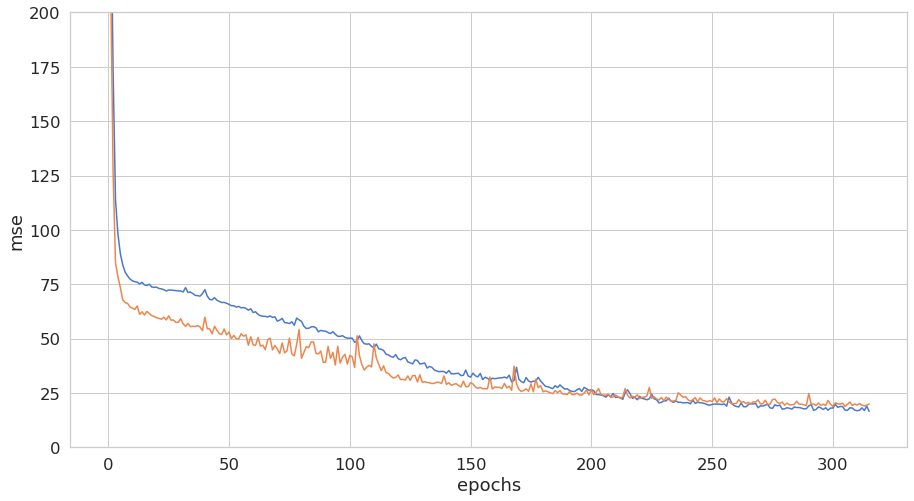

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.xlabel('epochs')
plt.ylabel('mse')

plt.plot(his.history['loss'][0:])
plt.plot(his.history['val_loss'][0:])
plt.ylim(0,200)


### Step5: Predictions <a class="anchor" id="predictions"></a>

### MSE on Test Set

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"The mse on the test set is {round(mse, 2)}")

The mse on the test set is 19.95


### MSE on Test Set - Based on Saved Best Model

In [89]:
# load best model
best_model = tf.keras.models.load_model('best_model.hdf5')

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"The mse on the test set is {round(mse, 2)}")

The mse on the test set is 18.79


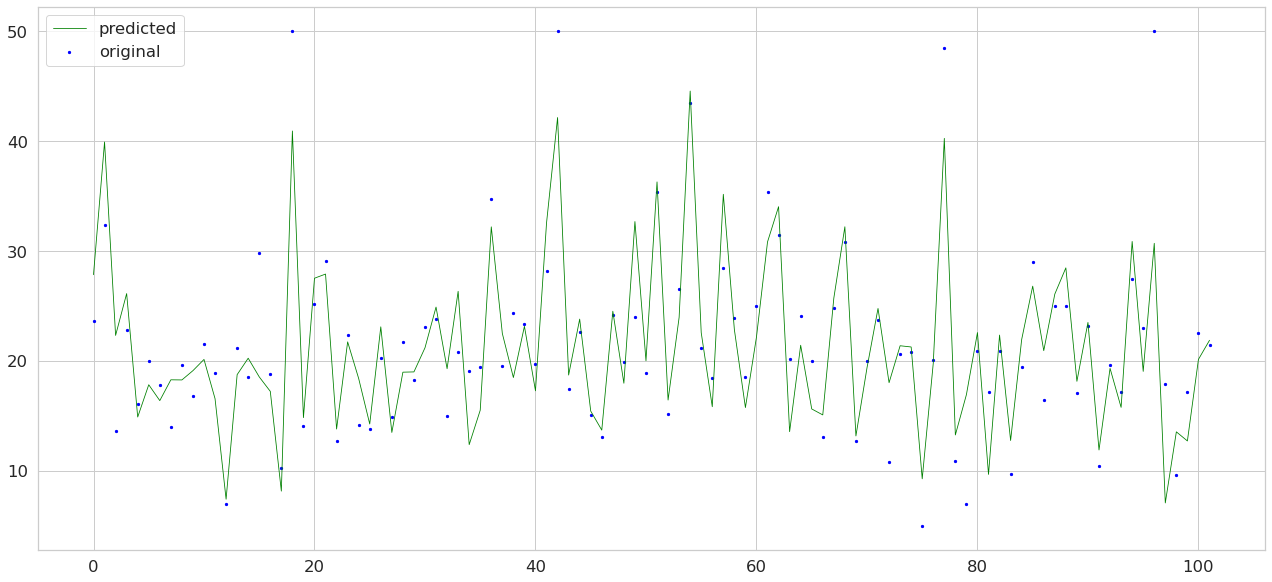

In [87]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
from pylab import rcParams


register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original") 
plt.plot(x_ax, y_pred, lw=0.8, color="green", label="predicted")
plt.legend()
plt.show()
